* data about a number of different marketing promotions that have been offered to customers.
* have data on which offers each customer responded to
* different clustering techniques, and visualize the results using principal component analysis

2. Use meanshift clustering (with quantile = 0.1) to cluster the data.
3. Use kmodes clustering (with k = 4) to cluster the data.
4. Use kmeans clustering (with k=4 and random_state=100) to cluster the data.
5. Using dimensionality reduction (principal component analysis), visualize the resulting clustering of each method.

In [106]:
import pandas as pd

df = pd.read_csv('data_science/customer_offers.csv').set_index('customer_name')

In [107]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [108]:
len(df.index)

100

In [109]:
from sklearn import cluster

X = df.values
bandwidth = cluster.estimate_bandwidth(X, quantile=0.1, n_samples=500)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

df['ms_cluster'] = ms.fit_predict(X)

In [110]:
bandwidth

1.77606525072081

In [111]:
df['ms_cluster'].unique()

array([0, 1, 3, 2], dtype=int64)

In [112]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,ms_cluster
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [113]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=4)
df['kmode_cluster'] = km.fit_predict(X)

In [114]:
model = cluster.KMeans(n_clusters=4, random_state=100)
df['kmean_cluster'] = model.fit_predict(X)

In [115]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,ms_cluster,kmode_cluster,kmean_cluster
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,3
Allen,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,2
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,2


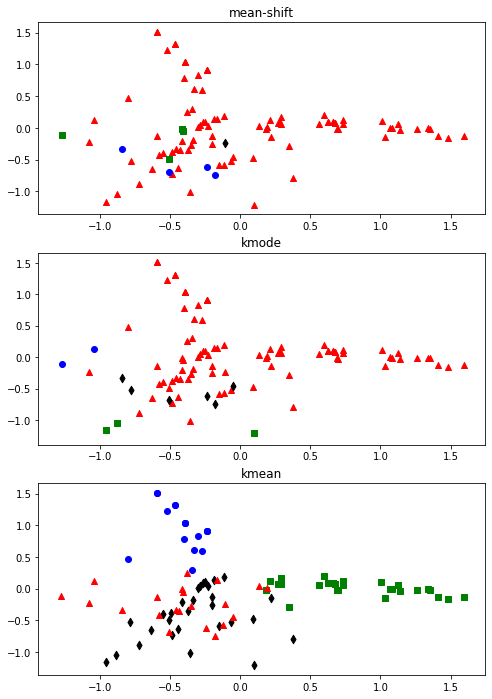

In [116]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

pca = decomposition.PCA(n_components=2)
df['pc1'], df['pc2'] = zip(*pca.fit_transform(X))

plt.figure(figsize=(8,12))

ax = plt.subplot(3, 1, 1)
for c in df['ms_cluster'].unique():
    d = df[df['ms_cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    
ax.set_title('mean-shift')

ax = plt.subplot(3, 1, 2)
for c in df['kmode_cluster'].unique():
    d = df[df['kmode_cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    
ax.set_title('kmode')

ax = plt.subplot(3, 1, 3)
for c in df['kmean_cluster'].unique():
    d = df[df['kmean_cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    
ax.set_title('kmean')

plt.show()